In [1]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox# for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations

In [2]:
df = gpd.read_file('dataframes/quartiers_sociologiques_2014.geojson') # arrondisement data

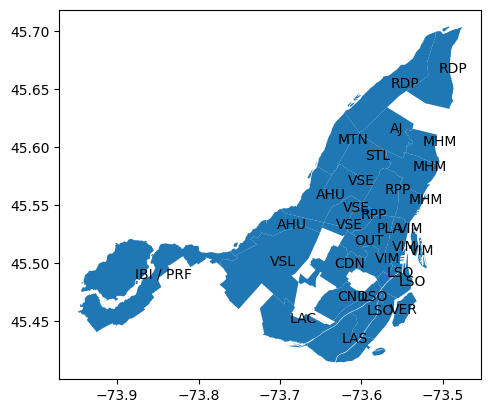

In [4]:
ax = df.plot()
for idx, row in df.iterrows():
    ax.annotate(text=row['Abreviation'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black')
plt.show()

In [5]:
city = 'Montreal, Canada'
drive_graph = ox.graph_from_place(city, network_type='drive')

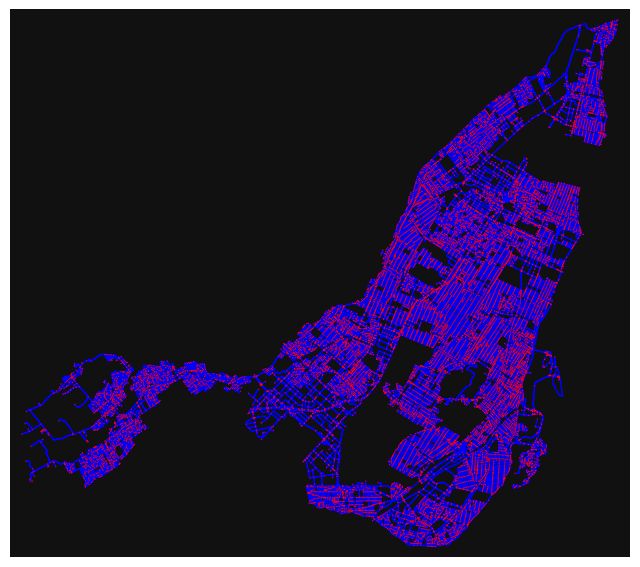

In [10]:
ox.plot_graph(drive_graph, node_color="r", edge_color='b', node_size=0.7);

In [9]:
pois = ox.geometries_from_place(
    city, tags={"amenity": True}
)

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_37987/3808332410.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  pois = ox.geometries_from_place(


In [12]:
# retrieved from emma's pois_cleaning.ipynb
# remove any poi amenity types where there are less than 10 of that type
clean_pois = pois.groupby('amenity').filter(lambda x: len(x) >= 10)
# Initialize an empty list to hold the values for the new column
amenity_cat = []

# Iterate over each value in the 'amenity' column
for x in clean_pois['amenity']:
    # Check conditions and assign corresponding category to amenity_cat list
    if x == 'restaurant' or x == 'cafe' or x == 'fast_food':
        amenity_cat.append('eatery') # edit name of category
    else:
        amenity_cat.append('other') # leave as blank rather than other

# Assign the populated list to the new column 'amenity_cat'
clean_pois['amenity_cat'] = amenity_cat

In [15]:
clean_pois.to_csv('clean_pois', index=False)

In [22]:
pharmacies = clean_pois[clean_pois['amenity'] == 'pharmacy']
pharmacies = ox.project_gdf(pharmacies)
pharmacies

direction  \
element_type osmid                  
node         300491007        NaN   
             305549398        NaN   
             463988306        NaN   
             497839720        NaN   
             665607743        NaN   
...                           ...   
way          1102617185       NaN   
             1204963162       NaN   
             1218907661       NaN   
             1236339511       NaN   
             1248741231       NaN   

                                                                  geometry  \
element_type osmid                                                           
node         300491007                      POINT (615615.041 5051256.138)   
             305549398                      POINT (607457.545 5039104.491)   
             463988306                      POINT (612613.856 5041349.586)   
             497839720                      POINT (610727.876 5042263.988)   
             665607743                      POINT (607044.842 5044260.729)   
...                                                                    ...   
way          1102617185  POLYGON ((606213.874 5030701.253, 606216.663 5...   
             1204963162  POLYGON ((608840.474 5048752.999, 608859.282 5...   
             1218907661  POLYGON ((609014.500 5048543.256, 609030.981 5...   
             1236339511  POLYGON ((610923.243 5046553.732, 610915.056 5...   
             1248741231  POLYGON ((611316.998 5048683.472, 611336.376 5...   

                          amenity        name created_by addr:city  \
element_type osmid                                                   
node         300491007   pharmacy     Uniprix        NaN       NaN   
             305549398   pharmacy  Jean Coutu        NaN  Montréal   
             463988306   pharmacy  Pharmaprix        NaN       NaN   
             497839720   pharmacy  Jean Coutu        NaN  Montréal   
             665607743   pharmacy  Jean Coutu        NaN  Montréal   
...                           ...         ...        ...       ...   
way          1102617185  pharmacy      Proxim        NaN       NaN   
             1204963162  pharmacy  Jean Coutu        NaN       NaN   
             1218907661  pharmacy     Uniprix        NaN       NaN   
             1236339511  pharmacy     Uniprix        NaN       NaN   
             1248741231  pharmacy  Pharmaprix        NaN       NaN   

                        addr:housenumber addr:postcode addr:province  \
element_type osmid                                                     
node         300491007               NaN           NaN           NaN   
             305549398              5510       H3T 1Y9        Québec   
             463988306               NaN           NaN           NaN   
             497839720               501       H2J 1W6            QC   
             665607743               531       H2P 1V4            QC   
...                                  ...           ...           ...   
way          1102617185              NaN           NaN           NaN   
             1204963162             8630       H1R 2T7           NaN   
             1218907661              NaN           NaN           NaN   
             1236339511             4240           NaN           NaN   
             1248741231              NaN           NaN           NaN   

                                          addr:street  ... flats  \
element_type osmid                                     ...         
node         300491007                            NaN  ...   NaN   
             305549398   Chemin de la Côte-des-Neiges  ...   NaN   
             463988306                            NaN  ...   NaN   
             497839720       Avenue du Mont-Royal Est  ...   NaN   
             665607743                  Rue Jarry Est  ...   NaN   
...                                               ...  ...   ...   
way          1102617185                    90e Avenue  ...   NaN   
             1204963162                Boulevard Viau  ...   NaN   

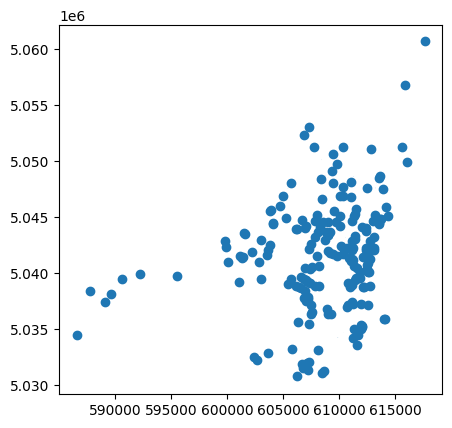

In [24]:
pharmacies.plot();

In [23]:
import numpy as np
pharmacies_coords = np.vstack((
    np.array(pharmacies.geometry.x),
    np.array(pharmacies.geometry.y)
)).T
pharmacies_coords

ValueError: x attribute access only provided for Point geometries